Most of the data-analysis work is done in this jupiter notebook. The assignment.py file is used for executing the streamlit framework, and helping with the visualization of the analysis in a single page app. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as px
from scipy import stats

# Load the dataset
data = pd.read_csv("../Data/openpowerlifting-2023-08-12-9f1b3427.csv")
# Filter data for "Event" is "SBD", "Equipment" is "Raw", and "Federation" is "IPF"
filtered_data = data.loc[(data["Event"] == "SBD") & (data["Equipment"] == "Raw") & (data["Federation"] == "IPF")]



# Separate data by gender and weight class

men_total_50kg = filtered_data[(filtered_data["Sex"] == "M") & (filtered_data["BodyweightKg"] >= 50) & (filtered_data["BodyweightKg"] <= 55)]["TotalKg"]
women_total_50kg = filtered_data[(filtered_data["Sex"] == "F") & (filtered_data["BodyweightKg"] >= 50) & (filtered_data["BodyweightKg"] <= 55)]["TotalKg"]

# Doing the same for the 100-105kg weight class

men_total_100kg = filtered_data[(filtered_data["Sex"] == "M") & (filtered_data["BodyweightKg"] >= 100) & (filtered_data["BodyweightKg"] <= 105)]["TotalKg"]
women_total_100kg = filtered_data[(filtered_data["Sex"] == "F") & (filtered_data["BodyweightKg"] >= 100) & (filtered_data["BodyweightKg"] <= 105)]["TotalKg"]

# Creating the data for the whole total

men_total = filtered_data[filtered_data['Sex'] == 'M']["TotalKg"]
women_total = filtered_data[filtered_data['Sex'] == 'F']["TotalKg"]

men_total = men_total.dropna()
women_total = women_total.dropna()

data_WPC = data[data['Federation'] == 'WPC']
men_total_WPC = data_WPC[data_WPC["Sex"] == "M"]["TotalKg"]
men_total_IPF = filtered_data[filtered_data["Sex"] == "M"]["TotalKg"]

men_bench = filtered_data[filtered_data["Sex"] == "M"]["Best3BenchKg"]
women_bench = filtered_data[filtered_data["Sex"] == "F"]["Best3BenchKg"]

men_bench = men_bench[men_bench >= 0]
women_bench = women_bench[women_bench >= 0]




C:\Users\Käyttäjä\AppData\Local\Temp\ipykernel_24824\2251018456.py:10: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../Data/openpowerlifting-2023-08-12-9f1b3427.csv")


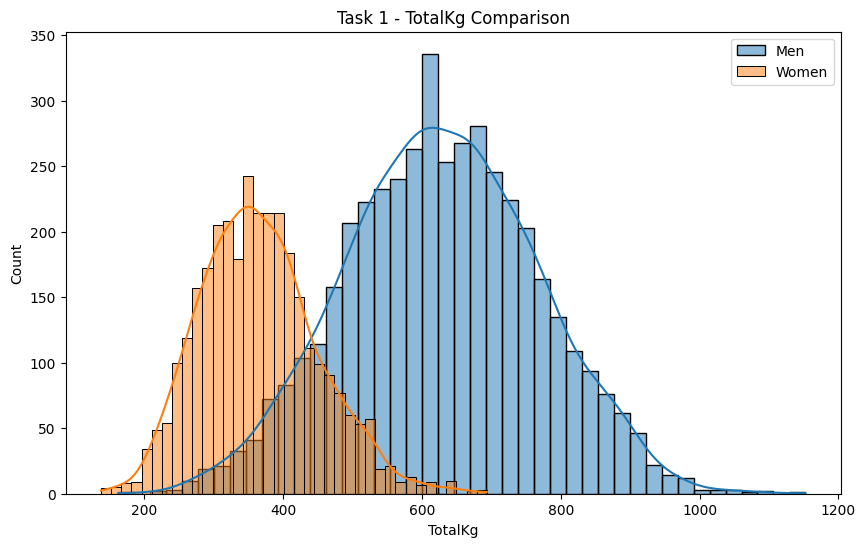

Task 1: Men lift more than women - TotalKg Comparison
Men's Mean TotalKg: 628.101755986317
Women's Mean TotalKg: 364.7892823269048
t-statistic: 94.79492392841424
p-value: 0.0
Hypothesis 1: Men lift more than women (TotalKg) is supported.


In [2]:
# Create histograms for TotalKg


plt.figure(figsize=(10, 6))
sns.histplot(men_total, kde=True, label='Men')
sns.histplot(women_total, kde=True, label='Women')
plt.title("Task 1 - TotalKg Comparison")
plt.xlabel("TotalKg")
plt.legend()
plt.show()


print("Task 1: Men lift more than women - TotalKg Comparison")
print(f"Men's Mean TotalKg: {men_total.mean()}")
print(f"Women's Mean TotalKg: {women_total.mean()}")
#The difference is clear in the graph, but let's perform a t-test
t_stat, p_value = stats.ttest_ind(men_total, women_total)
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("Hypothesis 1: Men lift more than women (TotalKg) is supported.")
else:
    print("Hypothesis 1: Men lift more than women (TotalKg) is not supported.")

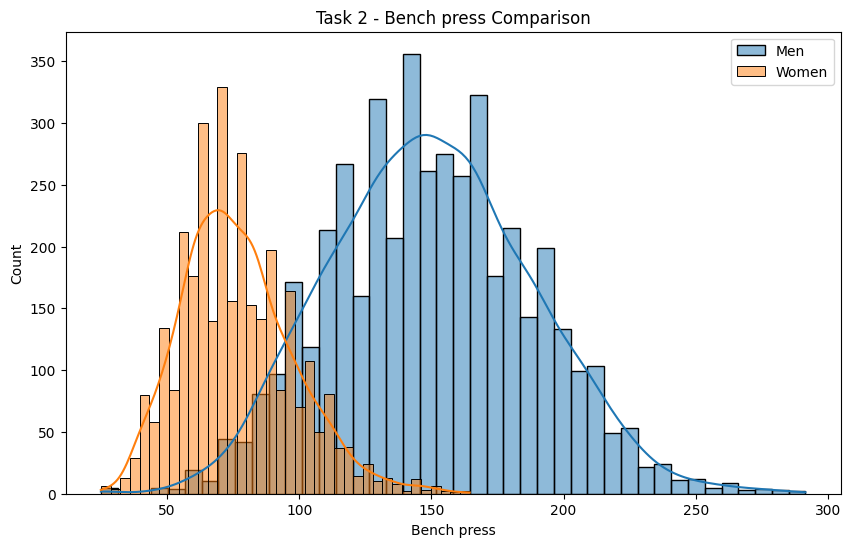

Task 2: Men bench press more than women
Men's Mean TotalKg: 149.98175999999998
Women's Mean TotalKg: 76.66977611940298
t-statistic: 98.0485057920161
p-value: 0.0
Hypothesis 2: Men bench press more than women is supported.


In [4]:
# Do the same process for the 2nd task



# Cleaning data from empty values


# Do not account for lifts listed as > 0



plt.figure(figsize=(10, 6))
sns.histplot(men_bench, kde=True, label='Men')
sns.histplot(women_bench, kde=True, label='Women')
plt.title("Task 2 - Bench press Comparison")
plt.xlabel("Bench press")
plt.legend()
plt.show()

t_stat, p_value = stats.ttest_ind(men_bench.dropna(), women_bench.dropna())
print("Task 2: Men bench press more than women")
print(f"Men's Mean TotalKg: {men_bench.mean()}")
print(f"Women's Mean TotalKg: {women_bench.mean()}")
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("Hypothesis 2: Men bench press more than women is supported.")
else:
    print("Hypothesis 2: Men bench press more than women is not supported.")

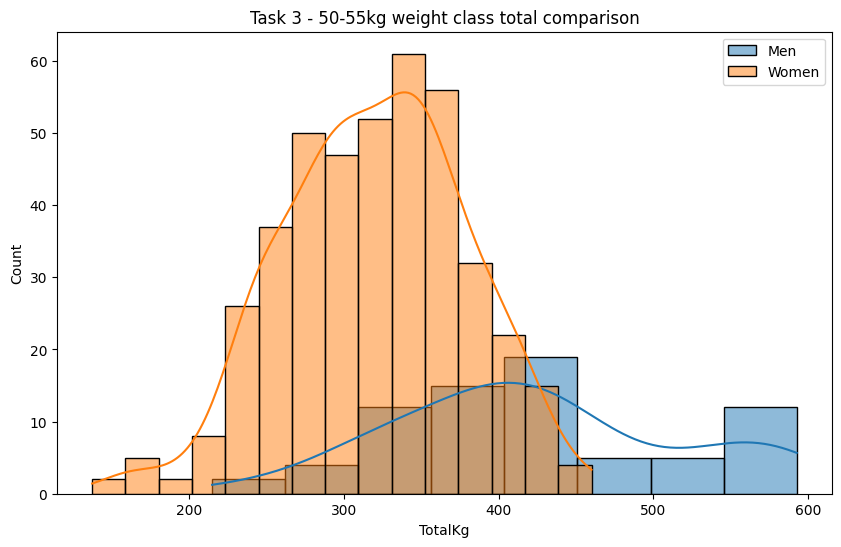

Task 3: 50-55kg weight class total comparison
Men's Mean TotalKg: 424.3051351351352
Women's Mean TotalKg: 319.8675417661098
t-statistic: 12.774417125709174
p-value: 1.8237705358360204e-32
Hypothesis 3: Men lift more than women in the 50-55kg bodyweight range is supported.


In [5]:

# Creating a histogram such as above for the totals

plt.figure(figsize=(10, 6))
sns.histplot(men_total_50kg, kde=True, label='Men')
sns.histplot(women_total_50kg, kde=True, label='Women')
plt.title("Task 3 - 50-55kg weight class total comparison")
plt.xlabel("TotalKg")
plt.legend()
plt.show()

# Running a t-test 
# For an unknown reason, the na values have to be dropped inside
# The testcase, if dropped before or elsewhere the test will return a nan value
# Aparently this bug has been a known issue with scipy since 2016 (according to a stackoverflow article)
# I may have lost my mind over this

t_stat, p_value = stats.ttest_ind(men_total_50kg.dropna(), women_total_50kg.dropna())
print("Task 3: 50-55kg weight class total comparison")
print(f"Men's Mean TotalKg: {men_total_50kg.mean()}")
print(f"Women's Mean TotalKg: {women_total_50kg.mean()}")
print("t-statistic:", t_stat)
print("p-value:", p_value)
alpha = 0.05  
if p_value < alpha:
    print("Hypothesis 3: Men lift more than women in the 50-55kg bodyweight range is supported.")
else:
    print("Hypothesis 3: Men lift more than women in the 50-55kg bodyweight range is not supported.")



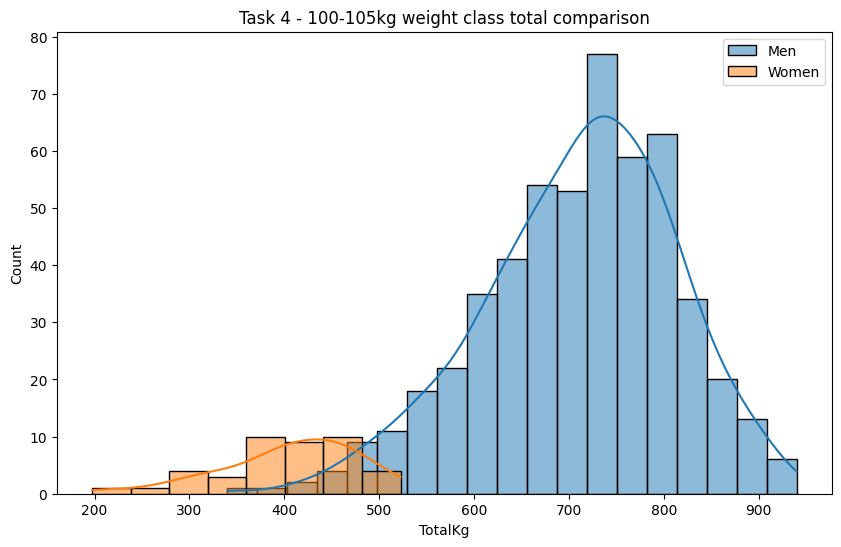

Task 4 - 100-105kg weight class total comparison
Men's Mean TotalKg: 710.8929254302103
Women's Mean TotalKg: 406.73809523809524
t-statistic: 19.038947098051707
p-value: 9.213849412750742e-63
Hypothesis 4: Men lift more than women in the 100-105kg bodyweight range is supported.


In [6]:

# Dropping empty values from the dataset



# Creating a histogram such as above for the totals

plt.figure(figsize=(10, 6))
sns.histplot(men_total_100kg, kde=True, label='Men')
sns.histplot(women_total_100kg, kde=True, label='Women')
plt.title("Task 4 - 100-105kg weight class total comparison")
plt.xlabel("TotalKg")
plt.legend()
plt.show()

# Running a t-test 

t_stat, p_value = stats.ttest_ind(men_total_100kg.dropna(), women_total_100kg.dropna())
print("Task 4 - 100-105kg weight class total comparison")
print(f"Men's Mean TotalKg: {men_total_100kg.mean()}")
print(f"Women's Mean TotalKg: {women_total_100kg.mean()}")
print("t-statistic:", t_stat)
print("p-value:", p_value)
alpha = 0.05  
if p_value < alpha:
    print("Hypothesis 4: Men lift more than women in the 100-105kg bodyweight range is supported.")
else:
    print("Hypothesis 4: Men lift more than women in the 100-105kg bodyweight range is not supported.")



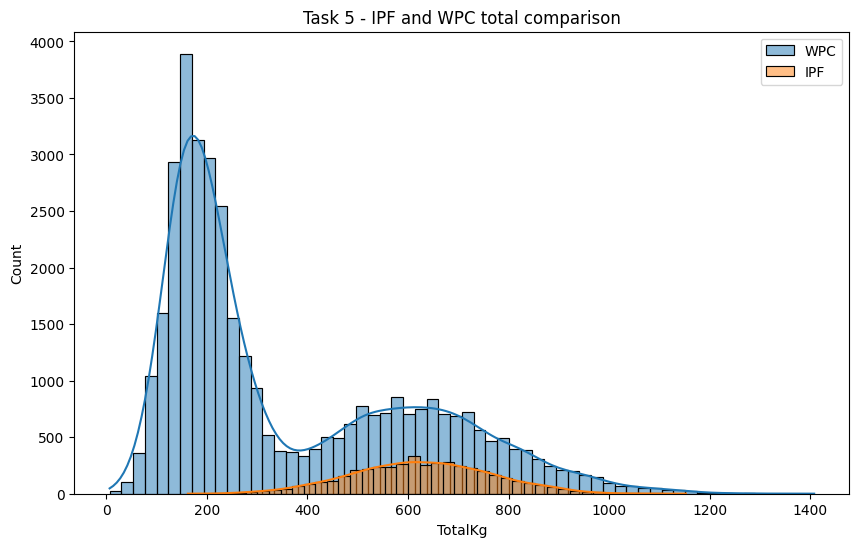

Task 5 - IPF and WPC total comparison
WPC's Mean TotalKg: 363.4129575919732
IPF's Mean TotalKg: 628.101755986317
t-statistic: -68.97554619451756
p-value: 0.0
Hypothesis 5: Men lift more in IPF than in WPC is supported.


In [7]:

# Dropping empty values from the dataset



# Creating a histogram such as above for the totals

plt.figure(figsize=(10, 6))
sns.histplot(men_total_WPC, kde=True, label='WPC')
sns.histplot(men_total_IPF, kde=True, label='IPF')
plt.title("Task 5 - IPF and WPC total comparison")
plt.xlabel("TotalKg")
plt.legend()
plt.show()

# Running a t-test 

t_stat, p_value = stats.ttest_ind(men_total_WPC.dropna(), men_total_IPF.dropna())
print("Task 5 - IPF and WPC total comparison")
print(f"WPC's Mean TotalKg: {men_total_WPC.mean()}")
print(f"IPF's Mean TotalKg: {men_total_IPF.mean()}")
print("t-statistic:", t_stat)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Hypothesis 5: Men lift more in IPF than in WPC is supported.")
else:
    print("Hypothesis 5: Men lift more in IPF than in WPC is not supported.")


In [8]:
#Hypothesis 6: Lifter country affects TotalKg

# Perform an ANOVA test to assess the impact of "Country" on "TotalKg"
model = ols('TotalKg ~ Country', data=filtered_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

alpha = 0.05  

p_value = anova_table['PR(>F)'][0]

if p_value < alpha:
    print("Hypothesis 6: Lifter country affects TotalKg is supported. There is a significant difference in TotalKg among countries.")
else:
    print("Hypothesis 6: Lifter country affects TotalKg is not supported. There is no significant difference in TotalKg among countries.")

Hypothesis 6: Lifter country affects TotalKg is supported. There is a significant difference in TotalKg among countries.


c:\Users\Käyttäjä\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 101, but rank is 100
  warnings.warn('covariance of constraints does not have full '
